# 3 - RL Enviroment 
In this part we are going to build the most essential Enviroment to create a RL  Pipeline.

The first framework that we are going to use is the  **RAY**

We are going to  pass either a string name or a Python class to specify an environment.  In particular we are going to choose the simplest local enviroment.

Custom env classes passed directly to the algorithm must take a single env_config parameter in their constructor:



### Example 1 - Gym + Ray

In [1]:
import gym, ray
from gym import spaces
from ray.rllib.algorithms import ppo

class MyEnv(gym.Env):
    def __init__(self, env_config=None):
       # There are two actions, first will get reward of 1, second reward of -1. 
        self.action_space = spaces.Discrete(5)      #<gym.Space>
        self.observation_space = spaces.Discrete(2) #<gym.Space>
    
    def reset(self):
        state = 0
        #return <obs>
        return state
                           
    def step(self, action):

        # if we took an action, we were in state 1
        state = 1
    
        if action == 2:
            reward = 1
        else:
            reward = -1
            
        # regardless of the action, game is done after a single step
        done = True

        info = {}
        # return <obs>, <reward: float>, <done: bool>, <info: dict>
        return state, reward, done, info   

Python 3.8.x
ray 1.0
tensorflow 2.3.1
tensorflow-probability 0.11
gym 0.17.3
pygame 2.0.0

numpy==1.23.1

In [3]:
from ray import tune

In [4]:
tune.run(
    "SAC", # reinforced learning agent
    name = "Training1",
    checkpoint_freq = 100,
    checkpoint_at_end = True,
    local_dir = r'./ray_results/',
    config={
        "env": MyEnv,
        "num_workers": 30,
        "num_cpus_per_worker": 0.5,
        "env_config":{
            "max_steps": 100,
            "export_frames": False,
            "export_states": False,
            # "reward_mode": "continuous",
            # "env_flipped": True,
            # "env_flipmode": True,
            }
        },
    stop = {
        "timesteps_total": 5_000,
        },
    )

2023-01-18 16:08:20,498	INFO worker.py:1538 -- Started a local Ray instance.


2023-01-18 16:08:24,383	INFO algorithm_config.py:2503 -- Your framework setting is 'tf', meaning you are using static-graph mode. Set framework='tf2' to enable eager execution with tf2.x. You may also then want to set eager_tracing=True in order to reach similar execution speed as with static-graph mode.
2023-01-18 16:08:24,384	INFO algorithm_config.py:2503 -- Your framework setting is 'tf', meaning you are using static-graph mode. Set framework='tf2' to enable eager execution with tf2.x. You may also then want to set eager_tracing=True in order to reach similar execution speed as with static-graph mode.
2023-01-18 16:09:35,287	WARNING insufficient_resources_manager.py:128 -- Ignore this message if the cluster is autoscaling. You asked for 16.0 cpu and 0 gpu per trial, but the cluster only has 8.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runti

In [3]:
ray.init()
#algo = ppo.PPO(env=MyEnv, config={"env_config": {},  # config to pass to env class
#})

#algo = ppo.PPO(env=MyEnv, config=config) 

algo = ppo.PPO(env=MyEnv,config={"num_workers": 4})

2023-01-17 15:12:35,207	INFO worker.py:1538 -- Started a local Ray instance.
2023-01-17 15:12:38,913	WARNING deprecation.py:47 -- DeprecationWarning: `algo = Algorithm(env='<class '__main__.MyEnv'>', ...)` has been deprecated. Use `algo = AlgorithmConfig().environment('<class '__main__.MyEnv'>').build()` instead. This will raise an error in the future!
2023-01-17 15:12:38,914	INFO algorithm_config.py:2503 -- Your framework setting is 'tf', meaning you are using static-graph mode. Set framework='tf2' to enable eager execution with tf2.x. You may also then want to set eager_tracing=True in order to reach similar execution speed as with static-graph mode.
2023-01-17 15:12:38,982	INFO algorithm.py:501 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
(RolloutWorker pid=9788) 2023-01-17 15:12:50,594	WARNING env.py:147 -- Your env doesn't have a .spec.max_episode_steps attribute. This is fine if you have set 'horizon' in your c

In [4]:
mean_ppo = []
for _ in range(25):
    result = algo.train()
    print("episode reward mean:", _, result['episode_reward_mean'])
    mean_ppo.append(result['episode_reward_mean'])

episode reward mean: 0 -0.5975
episode reward mean: 1 -0.134
episode reward mean: 2 0.22
episode reward mean: 3 0.6285
episode reward mean: 4 0.7415
episode reward mean: 5 0.8035
episode reward mean: 6 0.883
episode reward mean: 7 0.917
episode reward mean: 8 0.9455
episode reward mean: 9 0.97
episode reward mean: 10 0.988
episode reward mean: 11 0.9915
episode reward mean: 12 0.9985
episode reward mean: 13 0.998
episode reward mean: 14 0.9985
episode reward mean: 15 1.0
episode reward mean: 16 1.0
episode reward mean: 17 1.0
episode reward mean: 18 1.0
episode reward mean: 19 0.9995
episode reward mean: 20 1.0
episode reward mean: 21 1.0
episode reward mean: 22 0.9995
episode reward mean: 23 1.0
episode reward mean: 24 1.0


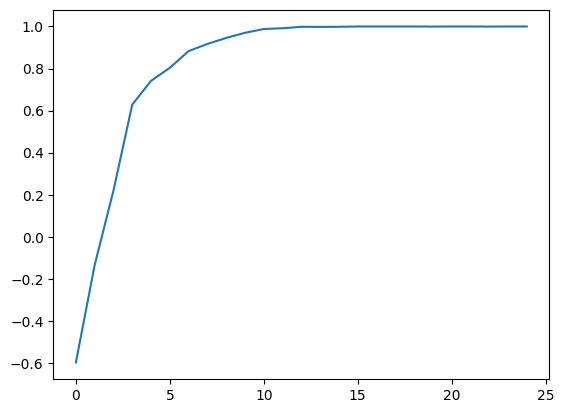

In [5]:
import matplotlib.pyplot as plt

xs = [x for x in range(len(mean_ppo))]

plt.plot(xs, mean_ppo)
plt.show()


### How to use the trained algorithm in RL with PP0

In [6]:
trainer=algo

In [7]:
checkpoint = trainer.save()

In [8]:
print(checkpoint)

C:\Users\RMAGANAV/ray_results\PPO_MyEnv_2023-01-17_15-12-38f9tlo2y0\checkpoint_000025


In [11]:
#TODO Fix the windows path
#evaluation = trainer.evaluate(checkpoint)

## Computing actions

In [30]:
env = MyEnv()

In [31]:
done = False
total_reward = 0

In [42]:
observations = env.reset()

In [47]:
print(observations) # The state which you should determine the action

0


Given any state compute the action which you get the maximum reward in according to the traning 

In [2]:
action = trainer.compute_single_action(observations)

NameError: name 'trainer' is not defined

In [50]:
action

2

In [51]:
while not done:
    action = trainer.compute_single_action(observations)
    observations, reward, done, info = env.step(action)
    total_reward += reward
    print("observations, reward, done, info",observations, reward, done, info)


In [52]:
action = trainer.compute_actions({"obs_1": observations, "obs_2": observations})
print(action)
# {'obs_1': 0, 'ob

{'obs_1': 2, 'obs_2': 2}


In the following rl test we are going to use  stable_baselines3

In [3]:
from stable_baselines3 import PPO
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import DummyVecEnv

import os
import time
import pygame
from pygame.surfarray import array3d

import matplotlib.pyplot as plt

pygame 2.0.0 (SDL 2.0.12, python 3.8.0)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [4]:
from stable_baselines3.common.env_checker import check_env
env = MyEnv()
check_env(env)

In [29]:
models_dir = f"models/{int(time.time())}/"
logdir = f"logs/{int(time.time())}/"

fps_controller = pygame.time.Clock()
fps_controller.tick(60)

# Checks for errors encountered
pygame.init()

# Initialise game window
pygame.display.set_caption('Training')

if not os.path.exists(models_dir):
    os.makedirs(models_dir)

if not os.path.exists(logdir):
    os.makedirs(logdir)


env = DummyVecEnv([lambda: Monitor(MyEnv(),logdir,allow_early_resets=True)])

model = PPO("MlpPolicy", env,verbose=1, tensorboard_log=logdir,n_epochs=10)

TIMESTEPS = 100
iters = 0

obs = env.reset()
while True:
    iters += 1
    model.learn(total_timesteps=TIMESTEPS, reset_num_timesteps=False, tb_log_name=f"PPO")
    model.save(f"{models_dir}/{TIMESTEPS*iters}")

Using cpu device
Logging to logs/1674134967/PPO_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | -0.54    |
| time/              |          |
|    fps             | 1375     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
Logging to logs/1674134967/PPO_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | -0.14    |
| time/              |          |
|    fps             | 1226     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 4096     |
---------------------------------
Logging to logs/1674134967/PPO_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 0.32     |
| time/              |          |
|    fps             | 1316     |


Logging to logs/1674134967/PPO_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 1        |
| time/              |          |
|    fps             | 1406     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 47104    |
---------------------------------
Logging to logs/1674134967/PPO_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 1        |
| time/              |          |
|    fps             | 1418     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 49152    |
---------------------------------
Logging to logs/1674134967/PPO_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 1        |
| time/              |          |
|    fps             | 1270     |
|    iterations  

Logging to logs/1674134967/PPO_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 1        |
| time/              |          |
|    fps             | 1089     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 92160    |
---------------------------------
Logging to logs/1674134967/PPO_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 1        |
| time/              |          |
|    fps             | 990      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 94208    |
---------------------------------
Logging to logs/1674134967/PPO_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 1        |
| time/              |          |
|    fps             | 986      |
|    iterations  

Logging to logs/1674134967/PPO_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 1        |
| time/              |          |
|    fps             | 1132     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 137216   |
---------------------------------
Logging to logs/1674134967/PPO_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 1        |
| time/              |          |
|    fps             | 933      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 139264   |
---------------------------------
Logging to logs/1674134967/PPO_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 1        |
| time/              |          |
|    fps             | 1270     |
|    iterations  

Logging to logs/1674134967/PPO_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 1        |
| time/              |          |
|    fps             | 1323     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 182272   |
---------------------------------
Logging to logs/1674134967/PPO_0


KeyboardInterrupt: 

In the following example we are interested to include pygame

### Example 2 - Gym + Ray + Pygame

In order to create an appropiate gym enviroment applied to ray and pygame we need need to pay attention into two gym objects:

-- action (object): The action to be performed in the step() function. 
In a game of chess, the action would be the specific, legal move performed by a player.

--observation (object): This is all the information available to the agent to choose the next action. 
The observation is based only on the current state of the environment.

## Observation_space and Action_space
In  particular  the observation_space and action_space:
there are only certain actions and observations are valid in regards of a specific environment. 

To define a format, the observation_space and action_space variables need to be assigned to a respective gym.space class.

Spaces can differ in their dimensionality and their value range. Continuous and discrete spaces are both possible.

self.observation_space = <gym.space>
self.action_space = <gym.space>


We are going to consider an enviroment where there are two
points, one red and one blu. The purpose of the game is give a blue point ( worker) where intercept the red point (target)

## Definition of action space

We want to control the position of the blue point.

So the action is the position, the action are the coordinates that you provides to the enviroment

action =[x, y]

The value of each coordinate are continous and must be in the range of the size of the horizontal box

gym.spaces.Box(low=min_x., high=max_x., shape=(2,), dtype=np.float32)

# Analysis of Spaces
Before we continue le us check some examples of spaces in order to understand how it works.

## Box

Box - Supports continuous (and discrete) vectors or matrices, used for vector observations, images, etc



In [30]:
from gym.spaces import Box, Discrete,MultiBinary , MultiDiscrete

In [31]:
# Example 1
observation_space = Box(low=-1.0, high=2.0, shape=(3, 4), dtype=np.float32)
print(observation_space.sample().shape)
observation_space.sample()

(3, 4)


array([[ 1.2375284 ,  1.8520315 ,  1.2477168 ,  0.66788256],
       [ 0.697291  ,  1.5505283 ,  1.9088516 ,  0.9037511 ],
       [ 1.3744783 ,  0.3835154 , -0.93176323,  1.1556283 ]],
      dtype=float32)

In [35]:
#Example 2
observation_space = Box(low=np.array([-1.0, -2.0]), high=np.array([2.0, 4.0]), dtype=np.float32)
print(observation_space.sample().shape)
observation_space.sample()

(2,)


array([0.1643283, 2.978584 ], dtype=float32)

(2,)


array([-0.01392434, -1.6684153 ], dtype=float32)

In [38]:
#Example 2
observation_space = Box(low=np.array(-1.0), high=np.array(2.0), dtype=np.float32)
print(observation_space.sample().shape)
observation_space.sample()

()


array(-0.98468465, dtype=float32)

In [78]:
# Example 1
observation_space = Box(low=0, high=200, shape=(2,), dtype=np.float32)
print(observation_space.sample().shape)
observation_space.sample()

(2,)


array([21.901665, 30.953516], dtype=float32)

## Discrete

In [65]:
#Example 3
observation_space =Discrete(2)            # {0, 1}
observation_space.sample()

1

In [68]:
#Example 4
observation_space =Discrete(3)  # {0, 1, 2}
observation_space.sample()

0

## MultiBinary

In [43]:
# Example 5
observation_space = MultiBinary(5)
print(observation_space.sample().shape)
observation_space.sample()

(5,)


array([0, 1, 1, 1, 0], dtype=int8)

In [71]:
# Example 5
observation_space = MultiBinary(2)
print(observation_space.sample().shape)
observation_space.sample()

(2,)


array([1, 0], dtype=int8)

# MultiDiscrete

In [136]:
# Example 6
observation_space =  MultiDiscrete(np.array([[1, 2], [3, 4]]))
print(observation_space.sample().shape)
observation_space.sample()

(2, 2)


array([[0, 1],
       [0, 0]], dtype=int64)

# Text

In [137]:
# Example 6a
#observation_space =Text(5)
# {"0", "42", "0123456789", ...}
#observation_space.sample()

In [138]:
# Example 6b
#import string
#observation_space = Text(min_length = 1,
#     max_length = 10,
#     charset = string.digits)
#observation_space.sample()

# Dict
Elements of this space are (ordered) dictionaries of elements from the constituent spaces

In [140]:
# Example 7
from gym.spaces import Dict, Discrete
observation_space = Dict({"position": Discrete(2), "velocity": Discrete(3)})
observation_space.sample()

OrderedDict([('position', 1), ('velocity', 1)])

In [142]:
#Example 8 [nested]:
from gym.spaces import Box, Dict, Discrete, MultiBinary, MultiDiscrete
observation_space =Dict(
    {
        "ext_controller": MultiDiscrete([5, 2, 2]),
        "inner_state": Dict(
            {
                "charge": Discrete(100),
                "system_checks": MultiBinary(10),
                "job_status": Dict(
                    {
                        "task": Discrete(5),
                        "progress": Box(low=0, high=100, shape=()),
                    }
                ),
            }
        ),
    }
)

In [144]:
type(observation_space.sample())

collections.OrderedDict

In [146]:
observation_space.sample()

OrderedDict([('color', 0),
             ('position', array([-0.5139792 ,  0.32359004], dtype=float32))])

In [147]:
# Example 9
from gym.spaces import Box, Discrete
observation_space = Dict({"position": Box(-1, 1, shape=(2,)), "color": Discrete(3)})

In [148]:
observation_space.sample()

OrderedDict([('color', 1),
             ('position', array([ 0.41649237, -0.20129618], dtype=float32))])

In [1]:
import pandas as pd

In [48]:
df1=pd.read_csv('seats_dataset.csv')

In [49]:
df1.head()

,id;building;floor;room;island;x_coord;y_coord
0,0;Artificial Test Building;1;;9;1161;463
1,1;Artificial Test Building;1;;14;393;463
2,2;Artificial Test Building;1;;7;1089;462
3,3;Artificial Test Building;1;;8;1017;462
4,4;Artificial Test Building;1;;13;602;462


In [ ]:

#id  x, y z 

In [50]:
df2 = pd.read_pickle("./employees.pkl")  

In [51]:
df2.head()

,id,role,client,practice,job,name,birthdate,username,mail,address
0,0,EM,Brown-Lindsey,DCX,"Production assistant, television",Jennifer Chavez,1944-11-05,wendy61,jamesmccall@hotmail.com,114 Bryan Throughway Suite 189\nSouth Andreamo...
1,1,EM,Davidson Inc,Robotics,Brewing technologist,Kenneth Goodwin,1974-01-04,adam32,amysantiago@hotmail.com,"12111 Harris Shoals\nChadburgh, NE 62238"
2,2,EM,"Williams, Lopez and Brown",I&S,Chartered certified accountant,Andrew Patterson,1958-09-15,mward,weaverlaura@gmail.com,"73286 Becker Courts Suite 329\nNew Rachelside,..."
3,3,EM,Jenkins-Hall,C&CA,Film/video editor,Patrick Jenkins DDS,1912-10-04,eric66,jonathan41@hotmail.com,"331 Silva Ways\nLake Meghanshire, MD 15360"
4,4,EM,"Bender, Hamilton and Hendricks",Data Engineer,Health promotion specialist,Brandi Crawford,1919-06-26,sarahbarnes,wendy20@yahoo.com,"31349 Smith Light\nLindaberg, FL 97316"


In [4]:
df1.head()

,id;building;floor;room;island;x_coord;y_coord
0,0;Artificial Test Building;1;;9;1161;463
1,1;Artificial Test Building;1;;14;393;463
2,2;Artificial Test Building;1;;7;1089;462
3,3;Artificial Test Building;1;;8;1017;462
4,4;Artificial Test Building;1;;13;602;462


In [ ]:
#Example 10
observation_space = = gym.spaces.Dict(
    {"x_position": gym.spaces.Box(low=0, high=6, shape=(self.max_sit,), dtype=np.uint8),
     "y_position": gym.spaces.Box(low=0, high=6, shape=(self.max_sit,), dtype=np.uint8),
     "cluster": gym.spaces.Box(low=0, high=6, shape=(self.max_sit,), dtype=np.uint8),
     "project": gym.spaces.Box(low=0, high=6, shape=(self.max_sit,), dtype=np.uint8),
     "energy_consumption": gym.spaces.Box(low=0, high=1, shape=(self.max_sit,)),
     "emp_project": gym.spaces.Box(low=0, high=6, shape=(1,), dtype=np.int32),
     "emp_energy_consumption": gym.spaces.Box(low=0.0, high=1.0, shape=(1,), dtype=np.float32)
     }
)

# Tuple

In [151]:
# Example 10
from gym.spaces import Box, Discrete, Tuple
observation_space = Tuple((Discrete(2), Box(-1, 1, shape=(2,))))
observation_space.sample()

(0, array([ 0.40006354, -0.14882036], dtype=float32))

# Sequence

In [157]:
# Example 11
#from gym.spaces import Sequence
#space = Sequence(Box(0, 1))
#space.sample()

for futher information visit
https://gymnasium.farama.org/api/spaces/composite/#gymnasium.spaces.Dict

# ---- Summary---

Discrete - Supports a single discrete number of values with an optional start for the values

MultiDiscrete - Supports single or matrices of binary values, used for holding down a button or if an agent has an object

MultiBinary - Supports multiple discrete values with multiple axes, used for controller actions

Text - Supports strings, used for passing agent messages, mission details, etc

Composite Spaces
Often environment spaces require joining fundamental spaces together for vectorised environments, separate agents or readability of the space.

Dict - Supports a dictionary of keys and subspaces, used for a fixed number of unordered spaces

Tuple - Supports a tuple of subspaces, used for multiple for a fixed number of ordered spaces

Sequence - Supports a variable number of instances of a single subspace, used for entities spaces or selecting a variable number of actions

Graph - Supports graph based actions or observations with discrete or continuous nodes and edge values.


Example: if we want to build an observation of a PNG image , you can use the follow:


    # The action and observation spaces need to be gym.spaces objects:
    self.action_space = Discrete(4)  # up, left, right, down
    # Here's an observation space for 200 wide x 100 high RGB image inputs:
    self.observation_space = Box(
        low=0, high=255, shape=(100, 200, 3), dtype=np.uint8)

In [1]:
import gym
from gym import spaces
import numpy as np
import pygame
from pygame import display
from pygame.surfarray import array3d
import random

BLACK = pygame.Color(0, 0, 0)
WHITE = pygame.Color(255, 255, 255)
RED = pygame.Color(255, 0, 0)
GREEN = pygame.Color(0, 255, 0)
BLUE = pygame.Color(0, 0, 255)
worker_pos=[0,0]


class MyEnv(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self):

        # We inizialize the display
        self.frame_size_x = 200
        self.frame_size_y = 200
        self.game_window = pygame.display.set_mode((self.frame_size_x, self.frame_size_y))   
        
        # Define action and observation space
        # They must be gym.spaces objects    
            
        # ------------------ACTION SPACE----------------------------------
        # The action space are the possible actions that is allowed by the worker
        # previously was a simple number 
        # self.action_space = spaces.Discrete(1)
        # Now in this example a simple action is a single coordinates (x,y)
        
        self.action_space = gym.spaces.Box(low=0, high=200, shape=(2,), dtype=np.int32)#dtype=np.float32) 
        
        
        # ------------------OBSERVATION SPACE-------------------------------
        # Is what the state  is observed
        #Previously was a single number discrete
        #self.observation_space = gym.spaces.Discrete(2)
        # For this example we choose a numpy array   shape=(2,) or an image
        # Attention!!! The observation space should have the same shape that the reset 
        # In order to perform the RL training otherwise will fail!!
       
        self.observation_space = spaces.Box(low=0, high=200,
                                            shape=(2,), dtype=np.int32) #np.float32) 
        '''
        self.observation_space = gym.spaces.Dict(
            {"x_position": gym.spaces.Box(low=0, high=6, shape=(1,), dtype=np.uint8),
             "y_position": gym.spaces.Box(low=0, high=6, shape=(1,), dtype=np.uint8),
             }
        )
        '''
        
        # Initial conditions
        
        self.game_window.fill(WHITE)
        # Moreover we add a position in the screen display
        
        # Initial worker position
        self.worker_pos=[0,0]
        
    
        #We assing a kind of gym object to a circle 
        self.worker_rect=pygame.draw.circle(self.game_window,BLUE,(self.worker_pos[0], self.worker_pos[1]),6) # DRAW CIRCLE

        # Initial target position
        
        self.target_pos = [100, 100]
        print('Initial target position',self.target_pos[0],self.target_pos[1])
        self.target_rect=pygame.draw.circle(self.game_window,RED,(self.target_pos[0], self.target_pos[1]),6) # DRAW CIRCLE
        self.steps = 0

    def reward_value(self,worker,target):
         #Check for collision between two rects
        if worker.colliderect(target):
            #print("worker, target",worker, target)
            reward=1.0
            done=True    
        else:
            reward=-1.0
            done=False
        return reward
              
    def step(self, action):
        reward = 0.0
        
        self.worker_pos = action
        print(self.worker_pos)
            
        # We update the state with an image ( in other words plot the points due to the action)
        self.update_game_state()

        #print(self.worker_rect,self.target_rect)
        
        reward= self.reward_value(self.worker_rect,self.target_rect)
 
        # regardless of the action, game is done after step becomes true
        reward_tmp, done = self.game_over(reward)
        info = {}        
        
        # -----Under the assuption that we deal with an image---
        #img = self.get_image_array_from_game()
        #state=img
        #--------------------------------------------------------
        self.state=[self.target_pos[0], self.target_pos[1]]

        #print('step:', self.steps)
        self.steps += 1
        
        observation = np.array(self.state, dtype=np.int32) #float32)
        return observation, reward, done, info
    
    def worker_step(self,event):   
        '''
        Takes human keyboard event and then returns it as an action string
        '''
        action = None
        if event.type == pygame.QUIT:
            pygame.quit()
            sys.exit()
            
        #Move based on mouse clicks
        if event.type == pygame.MOUSEBUTTONDOWN:
            #print(event)
            mouse_x = event.pos[0]
            mouse_y = event.pos[1]
            self.worker_pos[0]=mouse_x
            self.worker_pos[1]=mouse_y
            action = [self.worker_pos[0], self.worker_pos[1]]
        #Drag the object when the mouse button is clicked
        
        if event.type == pygame.MOUSEMOTION and event.buttons[0] == 1:
            #print(event)
            mouse_x = event.pos[0]
            mouse_y = event.pos[1]
            self.worker_pos[0]=mouse_x
            self.worker_pos[1]=mouse_y
            action = [self.worker_pos[0], self.worker_pos[1]]   
        
        elif event.type == pygame.KEYDOWN:
            # Esc -> Create event to quit the game
            if event.key == pygame.K_ESCAPE:
                pygame.event.post(pygame.event.Event(pygame.QUIT))                
        
        return  action    
    
    def update_game_state(self):
        
        #We fill the screen to white
        self.game_window.fill(WHITE)
        
        #Draw rectangles to represent the rect's of each object
        # For the worker
        
        self.worker_rect.x=self.worker_pos[0]
        self.worker_rect.y=self.worker_pos[1]
        self.worker_rect=pygame.draw.circle(self.game_window,BLUE,(self.worker_rect.x,self.worker_rect.y),6) # DRAW CIRCLE
        
        # For the target
        self.target_rect.x=self.target_pos[0]
        self.target_rect.y=self.target_pos[1]        
        pygame.draw.circle(self.game_window,RED,(self.target_rect.x,self.target_rect.y),6) # DRAW CIRCLE


    def get_image_array_from_game(self):
        img = array3d(display.get_surface())
        #Preprocessing of channels ( needed for tensorflow)
        img = np.swapaxes(img, 0, 1)
        return img    
    
    def reset(self):
        
        # Type 1 Observation
        #print('Target position',self.target_pos[0], self.target_pos[1])
        #observation = np.array([self.target_pos[0], self.target_pos[1]])
        
        #Type 2 Observation
        #We create a simple observation state from a sample
        self.state = self.observation_space.sample()
        #sit_random = np.random.randint(1, 9)
        #self.state['x_position'][sit_random:] = 0
        #self.state['y_position'][sit_random:] = 0
        #observation = self.state
        observation = np.array(self.state, dtype=np.int32) #float32)
        
        # Type 3 Observation
        #img = array3d(display.get_surface())
        #img = np.swapaxes(img, 0, 1)
        #observation=img
        
        self.steps = 0
        
        print("Game Reset.")   
        return observation    
    
    def render(self, mode='human'):
        if mode == "human":
            display.update()        
    def close(self):
        pass
    
    def game_over(self, reward):
        if (reward < 1) or (self.steps >= 1000): 
            return -1, True
        else:
            return reward, False

pygame 2.0.0 (SDL 2.0.12, python 3.8.0)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
# method 1 - use local test class
# Testing local frame
env = MyEnv()


Initial target position 100 100


In [3]:
test=env.reset()

Game Reset.


In [4]:
test.shape

(2,)

In [5]:
action = env.action_space.sample()
print('action',action)

action [186 159]


In [6]:
action=[100,100]
state, reward, done, info = env.step(action)
print("Reward = {} with action = {}".format(reward,action))
import matplotlib.pyplot as plt
print(reward, done, info)
#state = np.array(state)

print(state,type(state))
#plt.figure()
#plt.imshow(state)

[100, 100]
Reward = 1.0 with action = [100, 100]
1.0 False {}
[100 100] <class 'numpy.ndarray'>


In [7]:
# Testing multiple frames
import sys
env = MyEnv()
env.reset()
# This is technically a FPS Refresh rate
FPS = 10
# FPS (frames per second) controller
fps_controller = pygame.time.Clock()
# Checks for errors encountered
check_errors = pygame.init()
# Initialise game window
pygame.display.set_caption('Testing Game') 
#The main game loop
running = True
while running:
    # Check Input from Human Step 
    for event in pygame.event.get():
        action = env.worker_step(event)    
        if event.type == pygame.QUIT:
            running = False
        pygame.display.update()
        if action != None :# (0,0) :# and reward!=0:
            #print(action,type(action))
            state, reward, done, info = env.step(action)
            print("Reward = {} with action = {}".format(reward,action))
            # Refresh game screen    
    # Refresh rate
    fps_controller.tick(FPS)
    img = array3d(env.game_window)

Initial target position 100 100
Game Reset.
[136, 82]
Reward = -1.0 with action = [136, 82]
[134, 146]
Reward = -1.0 with action = [134, 146]
[101, 100]
Reward = 1.0 with action = [101, 100]


SystemExit: 

C:\Users\RMAGANAV\Anaconda3\envs\rl2\lib\site-packages\IPython\core\interactiveshell.py:3441: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


# stable_baselines3

In [8]:
from stable_baselines3.common.env_checker import check_env
env = MyEnv()
check_env(env)

Initial target position 100 100
Game Reset.
[102  14]
[100  61]
Game Reset.
[190 190]
Game Reset.
[23 14]
Game Reset.
[ 79 162]
Game Reset.
[102 161]
Game Reset.
[141 154]
Game Reset.
[ 86 172]
Game Reset.
[  2 160]
Game Reset.
[  3 186]
Game Reset.
[52 48]
Game Reset.


C:\Users\RMAGANAV\Anaconda3\envs\rl2\lib\site-packages\stable_baselines3\common\env_checker.py:361: UserWarning: We recommend you to use a symmetric and normalized Box action space (range=[-1, 1]) cf https://stable-baselines3.readthedocs.io/en/master/guide/rl_tips.html
  warnings.warn(
C:\Users\RMAGANAV\Anaconda3\envs\rl2\lib\site-packages\stable_baselines3\common\env_checker.py:372: UserWarning: Your action space has dtype int32, we recommend using np.float32 to avoid cast errors.
  warnings.warn(


In [9]:
from stable_baselines3 import PPO
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import DummyVecEnv
import os
import time
import pygame
from pygame.surfarray import array3d
import matplotlib.pyplot as plt

In [10]:
models_dir = f"models/{int(time.time())}/"
logdir = f"logs/{int(time.time())}/"

fps_controller = pygame.time.Clock()
fps_controller.tick(60)

# Checks for errors encountered
pygame.init()

# Initialise game window
pygame.display.set_caption('Traning')

if not os.path.exists(models_dir):
    os.makedirs(models_dir)

if not os.path.exists(logdir):
    os.makedirs(logdir)

In [11]:
envrl = DummyVecEnv([lambda: Monitor(env,logdir,allow_early_resets=True)])

In [12]:
model = PPO("MlpPolicy", env,verbose=1, tensorboard_log=logdir,n_epochs=40)

#model = PPO("MultiInputPolicy", envrl,verbose=1, tensorboard_log=logdir,n_epochs=40)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [13]:
TIMESTEPS = 100
iters = 0
obs = env.reset()
while True:
    iters += 1
    model.learn(total_timesteps=TIMESTEPS, reset_num_timesteps=False, tb_log_name=f"PPO")
    model.save(f"{models_dir}/{TIMESTEPS*iters}")

Game Reset.
Game Reset.
Logging to logs/1674665006/PPO_0
[0.50561172 0.        ]
Game Reset.
[0.68849164 0.85381562]
Game Reset.
[0. 0.]
Game Reset.
[0.         0.07859796]
Game Reset.
[0.82245588 0.94355839]
Game Reset.
[0.01164185 0.        ]
Game Reset.
[0.01401737 0.31698591]
Game Reset.
[0.62325591 0.16130733]
Game Reset.
[0.31557974 1.19481385]
Game Reset.
[0. 0.]
Game Reset.
[0.80183142 0.13760759]
Game Reset.
[0.42642704 0.        ]
Game Reset.
[0.11741324 1.24505389]
Game Reset.
[0.79145902 0.91082126]
Game Reset.
[0.35764652 0.14609127]
Game Reset.
[0.41023886 0.53123176]
Game Reset.
[0. 0.]
Game Reset.
[0. 0.]
Game Reset.
[0. 0.]
Game Reset.
[0.53711826 0.        ]
Game Reset.
[0.         0.04833167]
Game Reset.
[0.67842609 0.90583122]
Game Reset.
[0.42731825 1.13676   ]
Game Reset.
[0. 0.]
Game Reset.
[0. 0.]
Game Reset.
[0. 0.]
Game Reset.
[0.72293901 1.03617406]
Game Reset.
[0.         1.31825316]
Game Reset.
[0. 0.]
Game Reset.
[0.         0.20546965]
Game Reset.
[0.9733

[0.35791099 0.        ]
Game Reset.
[0. 0.]
Game Reset.
[0.        0.1920929]
Game Reset.
[2.00793219 0.        ]
Game Reset.
[0. 0.]
Game Reset.
[0.         1.48070252]
Game Reset.
[0. 0.]
Game Reset.
[0.31950629 0.48659608]
Game Reset.
[0.36637351 1.13237226]
Game Reset.
[0.13187145 0.        ]
Game Reset.
[1.11885095 0.        ]
Game Reset.
[1.28438437 0.        ]
Game Reset.
[0.42080814 0.        ]
Game Reset.
[0.79237682 0.21919376]
Game Reset.
[0.       0.093832]
Game Reset.
[1.08676422 0.03086411]
Game Reset.
[1.71958375 0.        ]
Game Reset.
[0. 0.]
Game Reset.
[0.19682691 0.43302655]
Game Reset.
[0.26049474 0.        ]
Game Reset.
[0. 0.]
Game Reset.
[1.62960386 0.        ]
Game Reset.
[0.         0.32330704]
Game Reset.
[0. 0.]
Game Reset.
[0. 0.]
Game Reset.
[0. 0.]
Game Reset.
[1.0605197  0.09149519]
Game Reset.
[0.4873158  1.96288502]
Game Reset.
[0.        0.1471491]
Game Reset.
[0. 0.]
Game Reset.
[0. 0.]
Game Reset.
[0.0699594  0.04920151]
Game Reset.
[0. 0.]
Game Res

Game Reset.
[0.         0.93197876]
Game Reset.
[1.25584948 0.83398896]
Game Reset.
[0.06600091 0.3621268 ]
Game Reset.
[1.32294869 0.66612482]
Game Reset.
[1.48714781 0.82387322]
Game Reset.
[0. 0.]
Game Reset.
[0. 0.]
Game Reset.
[0.13066974 1.24790704]
Game Reset.
[0.         1.59297895]
Game Reset.
[0.68807501 0.        ]
Game Reset.
[0.         0.06145437]
Game Reset.
[0.         0.53728813]
Game Reset.
[0.         0.39580399]
Game Reset.
[1.04810727 0.86775506]
Game Reset.
[0. 0.]
Game Reset.
[0.        0.9907949]
Game Reset.
[0.         0.67764348]
Game Reset.
[0.         2.08477068]
Game Reset.
[0.599141   1.29380965]
Game Reset.
[0. 0.]
Game Reset.
[1.45194316 0.        ]
Game Reset.
[0.         0.18254068]
Game Reset.
[0.         0.83409971]
Game Reset.
[0.55655986 0.        ]
Game Reset.
[0.62623423 0.        ]
Game Reset.
[0. 0.]
Game Reset.
[0.         1.68412411]
Game Reset.
[0. 0.]
Game Reset.
[0.3691026  0.94810027]
Game Reset.
[0.         0.78763855]
Game Reset.
[0.   

[0.         0.55793166]
Game Reset.
[0.         0.66616416]
Game Reset.
[0.23777664 0.        ]
Game Reset.
[1.60244882 0.        ]
Game Reset.
[0.20641591 0.        ]
Game Reset.
[0.         1.28420734]
Game Reset.
[0. 0.]
Game Reset.
[0. 0.]
Game Reset.
[0.         0.63546711]
Game Reset.
[0.02980116 0.        ]
Game Reset.
[0. 0.]
Game Reset.
[0.         1.16074347]
Game Reset.
[0. 0.]
Game Reset.
[0.79944688 1.17777288]
Game Reset.
[0.20663135 0.        ]
Game Reset.
[0.5387153  0.77919078]
Game Reset.
[0.91941124 0.        ]
Game Reset.
[0. 0.]
Game Reset.
[0.         0.62565368]
Game Reset.
[0.         0.51022482]
Game Reset.
[1.43168581 0.6415748 ]
Game Reset.
[0. 0.]
Game Reset.
[0.10019282 1.64873254]
Game Reset.
[0. 0.]
Game Reset.
[0. 0.]
Game Reset.
[0.35776177 0.        ]
Game Reset.
[0. 0.]
Game Reset.
[0.         0.24791041]
Game Reset.
[0.95619065 0.68290204]
Game Reset.
[0.3552624  0.68463624]
Game Reset.
[0. 0.]
Game Reset.
[0.         0.13060334]
Game Reset.
[0. 0.]


[0. 0.]
Game Reset.
[0. 0.]
Game Reset.
[1.2639842  1.72532773]
Game Reset.
[0. 0.]
Game Reset.
[1.3530407 0.       ]
Game Reset.
[0.25622806 1.5414151 ]
Game Reset.
[0.58458871 0.95919931]
Game Reset.
[0.01501067 1.27971327]
Game Reset.
[0.52792275 0.78055376]
Game Reset.
[0. 0.]
Game Reset.
[0.87311447 0.17944205]
Game Reset.
[0.49236739 0.        ]
Game Reset.
[0.         1.75153255]
Game Reset.
[1.58136308 0.        ]
Game Reset.
[0.50728786 0.        ]
Game Reset.
[0.16323961 1.08816314]
Game Reset.
[0.70989305 0.        ]
Game Reset.
[1.83778358 0.        ]
Game Reset.
[1.42493224 0.        ]
Game Reset.
[0. 0.]
Game Reset.
[0. 0.]
Game Reset.
[0.49211186 0.2284181 ]
Game Reset.
[0.70033038 0.4095102 ]
Game Reset.
[0.         2.47919464]
Game Reset.
[0.46224371 0.84526521]
Game Reset.
[0. 0.]
Game Reset.
[0.81137896 0.        ]
Game Reset.
[0.35985219 0.        ]
Game Reset.
[0.96220326 0.11107052]
Game Reset.
[0.         1.53812528]
Game Reset.
[1.06514621 0.28352237]
Game Reset

Logging to logs/1674665006/PPO_0
[0.91768813 0.89742815]
Game Reset.
[0. 0.]
Game Reset.
[1.22410381 1.03031087]
Game Reset.
[0.39069778 0.        ]
Game Reset.
[0. 0.]
Game Reset.
[1.2731564  0.48566401]
Game Reset.
[0.         0.54189152]
Game Reset.
[1.30898845 0.        ]
Game Reset.
[0.20522559 0.10197684]
Game Reset.
[1.09135449 0.        ]
Game Reset.
[0.13833548 0.44263709]
Game Reset.
[0.         1.70213366]
Game Reset.
[0.04820321 0.5818904 ]
Game Reset.
[1.70841169 0.        ]
Game Reset.
[0.27718374 0.92408651]
Game Reset.
[0. 0.]
Game Reset.
[0.45663932 1.40881133]
Game Reset.
[1.03852069 0.3804293 ]
Game Reset.
[1.44158041 0.        ]
Game Reset.
[0.01665695 0.        ]
Game Reset.
[1.42860091 0.        ]
Game Reset.
[0.         0.31954622]
Game Reset.
[0.         0.55098069]
Game Reset.
[1.52651346 1.98321486]
Game Reset.
[0. 0.]
Game Reset.
[0.         1.07714641]
Game Reset.
[0. 0.]
Game Reset.
[0.         1.16121066]
Game Reset.
[0.12808818 0.        ]
Game Reset.
[0.

[0.         0.17958227]
Game Reset.
[0.64758992 0.        ]
Game Reset.
[0.06869841 0.        ]
Game Reset.
[0.         1.75269103]
Game Reset.
[0.64996594 0.        ]
Game Reset.
[0.         1.24897826]
Game Reset.
[0.         0.17707282]
Game Reset.
[0. 0.]
Game Reset.
[0.         0.57628119]
Game Reset.
[0.18511719 0.        ]
Game Reset.
[0.         0.02789064]
Game Reset.
[0. 0.]
Game Reset.
[1.14779103 0.        ]
Game Reset.
[0. 0.]
Game Reset.
[0.         2.00639606]
Game Reset.
[0. 0.]
Game Reset.
[2.22722912 0.        ]
Game Reset.
[0.21051979 0.        ]
Game Reset.
[0. 0.]
Game Reset.
[0.3302711 0.       ]
Game Reset.
[0. 0.]
Game Reset.
[0.         0.37538821]
Game Reset.
[0. 0.]
Game Reset.
[1.89708257 0.74047559]
Game Reset.
[0.44101447 0.        ]
Game Reset.
[0. 0.]
Game Reset.
[0.07175645 0.        ]
Game Reset.
[0. 0.]
Game Reset.
[2.71268535 0.54406869]
Game Reset.
[0.58000618 0.        ]
Game Reset.
[0.61401039 0.81064528]
Game Reset.
[0.91129714 0.71611869]
Game R

[1.03642416 0.        ]
Game Reset.
[0. 0.]
Game Reset.
[1.23772311 1.10797012]
Game Reset.
[0. 0.]
Game Reset.
[0.76909679 0.        ]
Game Reset.
[1.1004684 0.       ]
Game Reset.
[1.78527081 2.23484874]
Game Reset.
[1.40313292 0.        ]
Game Reset.
[0.083882 0.      ]
Game Reset.
[0.53114462 0.        ]
Game Reset.
[0. 0.]
Game Reset.
[1.50850916 0.        ]
Game Reset.
[0.         0.21485721]
Game Reset.
[0.58911729 0.47550377]
Game Reset.
[0.         0.29256693]
Game Reset.
[0.33079374 0.        ]
Game Reset.
[0. 0.]
Game Reset.
[0. 0.]
Game Reset.
[0.         0.55474901]
Game Reset.
[0.         1.59117258]
Game Reset.
[0.         1.49616671]
Game Reset.
[0.34107688 0.        ]
Game Reset.
[1.16301334 1.52676511]
Game Reset.
[0.61037338 0.95928448]
Game Reset.
[1.08055639 0.35078231]
Game Reset.
[0.73990184 0.        ]
Game Reset.
[0.         0.06345187]
Game Reset.
[0.4422242  0.92177832]
Game Reset.
[0.         0.00171269]
Game Reset.
[0.         0.98069304]
Game Reset.
[0.   

[0.         0.88439721]
Game Reset.
[0. 0.]
Game Reset.
[0.37131745 1.23923159]
Game Reset.
[0. 0.]
Game Reset.
[0. 0.]
Game Reset.
[1.99590039 1.01455247]
Game Reset.
[0.42204389 0.        ]
Game Reset.
[0.79961836 0.        ]
Game Reset.
[0. 0.]
Game Reset.
[0.         0.15601523]
Game Reset.
[0. 0.]
Game Reset.
[0.29116052 0.        ]
Game Reset.
[0.         0.39151824]
Game Reset.
[0. 0.]
Game Reset.
[0. 0.]
Game Reset.
[0. 0.]
Game Reset.
[0.5583601 0.       ]
Game Reset.
[0.94759071 0.75830692]
Game Reset.
[0.07156074 0.        ]
Game Reset.
[0.651187   0.48492137]
Game Reset.
[0. 0.]
Game Reset.
[0.         1.40622818]
Game Reset.
[0.68722433 0.62317991]
Game Reset.
[0.4105795 0.       ]
Game Reset.
[0. 0.]
Game Reset.
[0.96562856 0.96372336]
Game Reset.
[1.67686594 0.        ]
Game Reset.
[0.01237486 0.70500648]
Game Reset.
[0. 0.]
Game Reset.
[0. 0.]
Game Reset.
[0.74384892 1.76504886]
Game Reset.
[0.         1.07035422]
Game Reset.
[0. 0.]
Game Reset.
[0.02632049 0.91441232]


[0.5965389 0.       ]
Game Reset.
[0.         0.24274397]
Game Reset.
[1.74776638 0.        ]
Game Reset.
[0. 0.]
Game Reset.
[0. 0.]
Game Reset.
[0.         2.88507056]
Game Reset.
[0. 0.]
Game Reset.
[0.57827955 0.        ]
Game Reset.
[1.43667293 0.45969713]
Game Reset.
[2.76061106 0.55316055]
Game Reset.
[1.13532925 0.01918836]
Game Reset.
[0. 0.]
Game Reset.
[0.83702916 0.        ]
Game Reset.
[0.         0.23580675]
Game Reset.
[0.         1.16424024]
Game Reset.
[0.8249957  0.55498874]
Game Reset.
[0.05686818 1.59953129]
Game Reset.
[0.04571465 1.54781163]
Game Reset.
[0.         0.72371674]
Game Reset.
[0.88168913 1.85801196]
Game Reset.
[1.16604757 1.5087744 ]
Game Reset.
[0. 0.]
Game Reset.
[0.49329418 1.22365427]
Game Reset.
[2.03235579 2.66209006]
Game Reset.
[0.90660322 0.        ]
Game Reset.
[0.         0.28310585]
Game Reset.
[0.         1.79674375]
Game Reset.
[0.60197312 1.1624887 ]
Game Reset.
[0.87674946 0.31438941]
Game Reset.
[0.3762348  0.00209571]
Game Reset.
[0

Logging to logs/1674665006/PPO_0
[0.83964491 0.4754681 ]
Game Reset.
[0.         0.72216415]
Game Reset.
[0.03963773 0.        ]
Game Reset.
[0.         1.01070762]
Game Reset.
[0.18560591 0.        ]
Game Reset.
[0.26459345 1.59597564]
Game Reset.
[1.59199226 0.71861762]
Game Reset.
[0.63352746 0.        ]
Game Reset.
[0. 0.]
Game Reset.
[0.         0.04284217]
Game Reset.
[0. 0.]
Game Reset.
[0. 0.]
Game Reset.
[0.58627832 0.        ]
Game Reset.
[1.39264405 2.35227776]
Game Reset.
[0.         1.96589577]
Game Reset.
[0. 0.]
Game Reset.
[0.9736802  0.95319891]
Game Reset.
[1.64600492 0.51743484]
Game Reset.
[0. 0.]
Game Reset.
[0. 0.]
Game Reset.
[0.66153353 0.        ]
Game Reset.
[0.        1.0556258]
Game Reset.
[0. 0.]
Game Reset.
[0.09284628 0.        ]
Game Reset.
[1.67457151 0.56155211]
Game Reset.
[0.48299029 0.95102179]
Game Reset.
[0.62471002 0.24797939]
Game Reset.
[0. 0.]
Game Reset.
[0.29393998 0.        ]
Game Reset.
[0.54212332 0.        ]
Game Reset.
[0. 0.]
Game Rese

[0.         0.54339856]
Game Reset.
[0.         1.06839705]
Game Reset.
[1.69181323 0.76084638]
Game Reset.
[1.25155425 0.        ]
Game Reset.
[0. 0.]
Game Reset.
[0. 0.]
Game Reset.
[1.54454851 0.        ]
Game Reset.
[0. 0.]
Game Reset.
[1.69118822 0.49713483]
Game Reset.
[0. 0.]
Game Reset.
[0.06477433 0.        ]
Game Reset.
[0.         1.72577441]
Game Reset.
[0.43472034 0.        ]
Game Reset.
[2.10122824 0.        ]
Game Reset.
[0.69511008 0.        ]
Game Reset.
[0.06161147 0.87225366]
Game Reset.
[0.         1.76249874]
Game Reset.
[0.        2.7258966]
Game Reset.
[0.        0.4017204]
Game Reset.
[1.29900861 0.03583148]
Game Reset.
[0. 0.]
Game Reset.
[0.         0.51270533]
Game Reset.
[0.21183702 0.80288512]
Game Reset.
[0. 0.]
Game Reset.
[0.78128582 0.        ]
Game Reset.
[0.         0.69097173]
Game Reset.
[0.29580995 1.22141039]
Game Reset.
[0.         2.04246783]
Game Reset.
[0.49578723 1.20494795]
Game Reset.
[0. 0.]
Game Reset.
[0.         1.01491833]
Game Reset.


[0.         0.58853436]
Game Reset.
[0.         0.55724239]
Game Reset.
[1.21046352 0.        ]
Game Reset.
[0.         0.65051252]
Game Reset.
[0.         1.07942641]
Game Reset.
[0.         1.14089286]
Game Reset.
[0. 0.]
Game Reset.
[0.         1.36764896]
Game Reset.
[0.         0.14273563]
Game Reset.
[1.10489094 0.        ]
Game Reset.
[0.        0.6147666]
Game Reset.
[0.41221446 0.        ]
Game Reset.
[0.         0.72010511]
Game Reset.
[0.        1.4418987]
Game Reset.
[1.2068758  2.52843118]
Game Reset.
[0.         1.21853793]
Game Reset.
[1.59830773 0.        ]
Game Reset.
[1.56748354 0.        ]
Game Reset.
[1.43326771 0.5196166 ]
Game Reset.
[0. 0.]
Game Reset.
[0.         0.53305352]
Game Reset.
[0. 0.]
Game Reset.
[0. 0.]
Game Reset.
[0. 0.]
Game Reset.
[0. 0.]
Game Reset.
[0.75188106 0.        ]
Game Reset.
[0.22900747 1.57641351]
Game Reset.
[0.34031498 0.        ]
Game Reset.
[1.21371555 0.39981723]
Game Reset.
[0. 0.]
Game Reset.
[0. 0.]
Game Reset.
[1.33791447 0.  

[0.83435929 0.        ]
Game Reset.
[0. 0.]
Game Reset.
[0.         0.76080233]
Game Reset.
[0.         0.53904337]
Game Reset.
[0.2493822  1.51136613]
Game Reset.
[0.35410276 0.44831854]
Game Reset.
[0.         2.25851607]
Game Reset.
[1.23880506 1.15193653]
Game Reset.
[0.         0.45118216]
Game Reset.
[1.13343775 0.        ]
Game Reset.
[0.4900918  0.12229301]
Game Reset.
[0.64377391 0.21912673]
Game Reset.
[1.0768348 0.       ]
Game Reset.
[1.46682179 0.31739685]
Game Reset.
[0.85127205 0.        ]
Game Reset.
[0.         1.51707637]
Game Reset.
[0.         0.32650071]
Game Reset.
[0.52302432 2.148453  ]
Game Reset.
[0. 0.]
Game Reset.
[0.         0.27338451]
Game Reset.
[0. 0.]
Game Reset.
[0.45957053 0.        ]
Game Reset.
[0.10178415 0.21241796]
Game Reset.
[2.10008836 0.        ]
Game Reset.
[0.         2.74721909]
Game Reset.
[0.         1.13743401]
Game Reset.
[0. 0.]
Game Reset.
[0.         1.32548571]
Game Reset.
[0. 0.]
Game Reset.
[1.45127237 1.22119331]
Game Reset.
[0

[0.18392354 0.        ]
Game Reset.
[0.         0.19180018]
Game Reset.
[0.        0.8048709]
Game Reset.
[0.         0.17453986]
Game Reset.
[0. 0.]
Game Reset.
[0.02968284 0.        ]
Game Reset.
[0.         0.73210812]
Game Reset.
[0.         1.49759161]
Game Reset.
[0.         1.30478764]
Game Reset.
[1.67102695 0.75383723]
Game Reset.
[0. 0.]
Game Reset.
[0.17246148 0.        ]
Game Reset.
[0.         0.82245421]
Game Reset.
[0.56552625 0.69849527]
Game Reset.
[1.25219285 0.        ]
Game Reset.
[0.85135674 0.38105214]
Game Reset.
[0.00792815 0.        ]
Game Reset.
[0.90594912 0.        ]
Game Reset.
[0.         1.12866819]
Game Reset.
[0. 0.]
Game Reset.
[0.66983789 0.        ]
Game Reset.
[0.02149237 0.67964512]
Game Reset.
[0. 0.]
Game Reset.
[0. 0.]
Game Reset.
[0. 0.]
Game Reset.
[0.46564257 2.79808402]
Game Reset.
[0.18872148 0.        ]
Game Reset.
[0.6196233 1.8943274]
Game Reset.
[0.95259899 0.24067818]
Game Reset.
[0. 0.]
Game Reset.
[0.8815279 0.5031687]
Game Reset.
[0

Logging to logs/1674665006/PPO_0
[0.51376688 0.        ]
Game Reset.
[0.75519508 0.        ]
Game Reset.
[0.81313336 1.18039894]
Game Reset.
[0.94172543 0.        ]
Game Reset.
[0. 0.]
Game Reset.
[0. 0.]
Game Reset.
[0.         0.06538492]
Game Reset.
[0.         2.90317607]
Game Reset.
[0. 0.]
Game Reset.
[0. 0.]
Game Reset.
[0.1745217  0.03656901]
Game Reset.
[0.78374344 0.28212762]
Game Reset.
[0.        1.9462198]
Game Reset.
[1.86355948 1.37300968]
Game Reset.
[0. 0.]
Game Reset.
[0.         0.34467107]
Game Reset.
[1.58150268 0.46601668]
Game Reset.
[0.         1.43926823]
Game Reset.
[0.         1.51000524]
Game Reset.
[1.69818568 1.15246081]
Game Reset.
[0. 0.]
Game Reset.
[0.68460786 0.        ]
Game Reset.
[1.06721354 0.        ]
Game Reset.
[1.03493094 0.64785343]
Game Reset.
[0.         0.67147994]
Game Reset.
[0.         0.51284277]
Game Reset.
[0.         0.02641441]
Game Reset.
[1.19499683 1.99949574]
Game Reset.
[0.01822685 1.11988521]
Game Reset.
[0.         0.3784359

[0.         1.65702617]
Game Reset.
[0.18085031 0.81941199]
Game Reset.
[0.03028828 0.        ]
Game Reset.
[0. 0.]
Game Reset.
[0. 0.]
Game Reset.
[0. 0.]
Game Reset.
[0.53461725 0.        ]
Game Reset.
[1.65193427 0.31560612]
Game Reset.
[0.         2.45752311]
Game Reset.
[0. 0.]
Game Reset.
[0. 0.]
Game Reset.
[0.         0.87246901]
Game Reset.
[0.         0.04577603]
Game Reset.
[0.         0.36221689]
Game Reset.
[0.14686266 0.        ]
Game Reset.
[0.09016369 0.03944097]
Game Reset.
[0.         1.01281476]
Game Reset.
[0. 0.]
Game Reset.
[0.         2.11262846]
Game Reset.
[0.50263202 0.24641109]
Game Reset.
[0.77116615 0.        ]
Game Reset.
[0. 0.]
Game Reset.
[1.53945446 0.        ]
Game Reset.
[0.         0.19752333]
Game Reset.
[0. 0.]
Game Reset.
[1.0239166  1.35717702]
Game Reset.
[0. 0.]
Game Reset.
[0.01987143 0.65366822]
Game Reset.
[1.49359405 0.        ]
Game Reset.
[0. 0.]
Game Reset.
[0.         2.07786679]
Game Reset.
[0.58101648 0.        ]
Game Reset.
[0.71786

[0.         0.85338229]
Game Reset.
[0.         0.61858988]
Game Reset.
[0.32289636 1.00407243]
Game Reset.
[0.         0.83583963]
Game Reset.
[1.25804746 1.11403608]
Game Reset.
[0.73203838 0.22354399]
Game Reset.
[0. 0.]
Game Reset.
[0.31071725 0.        ]
Game Reset.
[2.68409777 0.        ]
Game Reset.
[0. 0.]
Game Reset.
[1.62323141 2.53229976]
Game Reset.
[0.90257406 0.16003466]
Game Reset.
[0. 0.]
Game Reset.
[0.58451921 0.4478935 ]
Game Reset.
[0.93800426 0.        ]
Game Reset.
[0.         1.04380858]
Game Reset.
[0. 0.]
Game Reset.
[0. 0.]
Game Reset.
[0.         0.34914398]
Game Reset.
[0.         0.79681081]
Game Reset.
[0.         0.39002734]
Game Reset.
[0.76826584 0.78693193]
Game Reset.
[0.99640286 2.21618772]
Game Reset.
[0.49148339 0.        ]
Game Reset.
[0.         0.17323029]
Game Reset.
[0.         1.05778301]
Game Reset.
[0.03876519 1.24809098]
Game Reset.
[0. 0.]
Game Reset.
[0.         0.07503462]
Game Reset.
[0.         0.65511632]
Game Reset.
[0.56719351 0.  

[0.         0.34511787]
Game Reset.
[1.26277637 0.        ]
Game Reset.
[0.20617187 0.        ]
Game Reset.
[0.52741396 0.        ]
Game Reset.
[0.93221885 1.04833043]
Game Reset.
[0.        0.0013067]
Game Reset.
[0. 0.]
Game Reset.
[0.50949895 0.        ]
Game Reset.
[0.         0.16204503]
Game Reset.
[0.79975653 0.        ]
Game Reset.
[2.23319936 0.52008885]
Game Reset.
[0. 0.]
Game Reset.
[0.         0.04788314]
Game Reset.
[0. 0.]
Game Reset.
[1.0378356 0.       ]
Game Reset.
[0.784563 0.      ]
Game Reset.
[0.         0.06419706]
Game Reset.
[0. 0.]
Game Reset.
[0. 0.]
Game Reset.
[0.28659189 1.82391846]
Game Reset.
[0.         1.73464358]
Game Reset.
[0. 0.]
Game Reset.
[1.48962736 0.        ]
Game Reset.
[0.88653493 0.92026091]
Game Reset.
[0.17958888 0.        ]
Game Reset.
[0.         1.80054247]
Game Reset.
[0.69998181 0.        ]
Game Reset.
[1.16420293 0.91430986]
Game Reset.
[0. 0.]
Game Reset.
[0.         0.81459427]
Game Reset.
[0.48371452 0.62824285]
Game Reset.
[0. 

[0. 0.]
Game Reset.
[0.         0.03521401]
Game Reset.
[0.         1.23056734]
Game Reset.
[1.38059878 0.        ]
Game Reset.
[0. 0.]
Game Reset.
[0. 0.]
Game Reset.
[0. 0.]
Game Reset.
[0.57611859 0.37078205]
Game Reset.
[0.         2.78207445]
Game Reset.
[0.       2.227314]
Game Reset.
[0. 0.]
Game Reset.
[1.06619561 0.43911666]
Game Reset.
[0.         0.48425412]
Game Reset.
[0.47666454 0.        ]
Game Reset.
[0.         0.39432251]
Game Reset.
[0.         0.90928459]
Game Reset.
[0.         0.09265576]
Game Reset.
[0. 0.]
Game Reset.
[0.8205204  0.64085871]
Game Reset.
[1.93586743 0.71402884]
Game Reset.
[0.59012175 0.5783819 ]
Game Reset.
[0.         1.23855925]
Game Reset.
[0.         1.15669727]
Game Reset.
[1.13333666 0.60450429]
Game Reset.
[0.         0.59728438]
Game Reset.
[0.         0.72013795]
Game Reset.
[1.30141139 0.20911612]
Game Reset.
[1.29067016 0.66057634]
Game Reset.
[0. 0.]
Game Reset.
[0.         0.27373612]
Game Reset.
[1.21906722 0.29433542]
Game Reset.


KeyboardInterrupt: 

# ray.rllib

In [3]:
import gym, ray
from ray.rllib.algorithms import ppo
#import ray.rllib.agents.ppo as ppo
from ray.rllib.algorithms.ppo import PPOConfig
from ray.tune.logger import pretty_print


In [4]:
#dir(ray)
ray.shutdown()
ray.init(ignore_reinit_error=True)

2023-01-25 22:20:00,512	INFO worker.py:1518 -- Started a local Ray instance.


Python version:,3.8.0
Ray version:,2.0.0


In [5]:
config = ppo.DEFAULT_CONFIG.copy()
config["log_level"] = "WARN"

In [ ]:
algo = ppo.PPO(env=MyEnv, config=config) 

In [ ]:
#print("Dashboard URL: http://{}".format(ray.get_webui_url()))

In [ ]:
#config = PPOConfig()#.rollouts(horizon=200) 
config={
        "env": MyEnv,
        "num_workers": 30,
        "num_cpus_per_worker": 0.5,
        "env_config":{
            "max_steps": 1000,
            "export_frames": False,
            "export_states": False,
            # "reward_mode": "continuous",
            # "env_flipped": True,
            # "env_flipmode": True,
            }
        }



In [ ]:
#algo = ppo.PPO(env=MyEnv, config={"env_config": {},  # config to pass to env class
#})

In [ ]:
mean_ppo = []
for _ in range(25):
    result = algo.train()
    print("episode reward mean:", _, result['episode_reward_mean'])
    mean_ppo.append(result['episode_reward_mean'])

In [ ]:
from ray import tune
tune.run(
    "SAC", # reinforced learning agent
    name = "Training2",
    checkpoint_freq = 100,
    checkpoint_at_end = True,
    local_dir = r'./ray_results/',
    config={
        "env": MyEnv,
        "num_workers": 30,
        "num_cpus_per_worker": 0.5,
        "env_config":{
            "max_steps": 1000,
            "export_frames": False,
            "export_states": False,
            # "reward_mode": "continuous",
            # "env_flipped": True,
            # "env_flipmode": True,
            }
        },
    stop = {
        "timesteps_total": 5_000_000,
        },
    )

2023-01-25 17:57:48,635	INFO worker.py:1538 -- Started a local Ray instance.


2023-01-25 17:57:59,627	INFO algorithm_config.py:2503 -- Your framework setting is 'tf', meaning you are using static-graph mode. Set framework='tf2' to enable eager execution with tf2.x. You may also then want to set eager_tracing=True in order to reach similar execution speed as with static-graph mode.
2023-01-25 17:57:59,629	INFO algorithm_config.py:2503 -- Your framework setting is 'tf', meaning you are using static-graph mode. Set framework='tf2' to enable eager execution with tf2.x. You may also then want to set eager_tracing=True in order to reach similar execution speed as with static-graph mode.
2023-01-25 17:59:10,810	WARNING insufficient_resources_manager.py:128 -- Ignore this message if the cluster is autoscaling. You asked for 16.0 cpu and 0 gpu per trial, but the cluster only has 8.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runti

2023-01-25 18:19:29,179	WARNING insufficient_resources_manager.py:128 -- Ignore this message if the cluster is autoscaling. You asked for 16.0 cpu and 0 gpu per trial, but the cluster only has 8.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2023-01-25 20:49:51,337	WARNING insufficient_resources_manager.py:128 -- Ignore this message if the cluster is autoscaling. You asked for 16.0 cpu and 0 gpu per trial, but the cluster only has 8.0 cpu and 0 gpu. Stop the tuning job and adjust the resources requested per trial (possibly via `resources_per_trial` or via `num_workers` for rllib) and/or add more resources to your Ray runtime.
2023-01-25 20:50:53,461	WARNING insufficient_resources_manager.py:128 -- Ignore this message if the cluster is autoscaling. You asked for 16.0 cpu and 0 gpu per trial, but the cluster only has 8.0 cpu and 0 gpu. Stop

In [ ]:
N_ITER = 30
s = "{:3d} reward {:6.2f}/{:6.2f}/{:6.2f} len {:6.2f} saved {}"

for n in range(N_ITER):
  result = algo.train()
  #file_name = agent.save(CHECKPOINT_ROOT)

  print(s.format(
    n + 1,
    result["episode_reward_min"],
    result["episode_reward_mean"],
    result["episode_reward_max"],
    result["episode_len_mean"],
    file_name
   ))